In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

1. Introduction
2. Data
3. EDA<br/>
   I.   The weak correlation<br/>
   II.  The strong correlation<br/>
   III. The weird correlation<br/>
4. Data Engineering/cleaning
5. Model Building
6. Test

In [2]:
df1 = pd.read_csv('student-por.csv', sep=';')

In [3]:
df2 = pd.read_csv('student-mat.csv', sep=';')

In [4]:
df = pd.concat([df1, df2])

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [103]:
df.shape

(991, 27)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

Skewness: -0.9859646596265079
Kurtosis: 1.7443194752957858


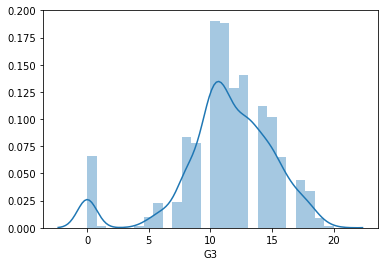

In [10]:
sns.distplot(df['G3'])
print('Skewness: '+ str(df['G3'].skew())) 
print("Kurtosis: " + str(df['G3'].kurt()))

Skewness needs to be between -0.5 and 0.5.
Kurtosis needs to be between 1 and -1.<br/>Not only this is a little off, it is also a bimodal distribution.<br/> I will adress this in feature engineering

<h2>The Weak

In [81]:
df.groupby(['famsize'])['G3'].mean().to_frame() 

,G3
famsize,
GT3,11.189702
LE3,11.709150


In [82]:
df.groupby(['Pstatus'])['G3'].mean().to_frame()

,G3
Pstatus,
A,11.669421
T,11.299025


In [83]:
df.groupby(['sex'])['G3'].mean().to_frame()

,G3
sex,
F,11.448393
M,11.203091


In [84]:
df.groupby(['famsup'])['G3'].mean().to_frame()

,G3
famsup,
no,11.277228
yes,11.382812


In [85]:
df.groupby(['activities'])['G3'].mean().to_frame()

,G3
activities,
no,11.212121
yes,11.474806


In [86]:
df.groupby(['nursery'])['G3'].mean().to_frame()

,G3
nursery,
no,11.033493
yes,11.419162


I am going to delete them to save space in feature engineering

<h2>The Strong

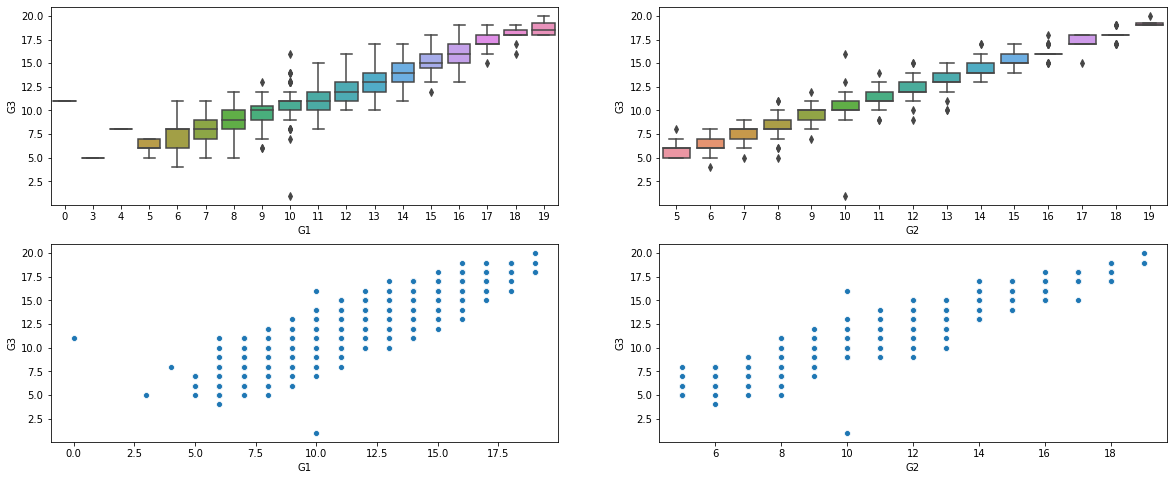

In [19]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(20)

sns.boxplot(x="G1", y="G3", data=df, ax=ax[0][0])
sns.boxplot(x="G2", y="G3", data=df, ax=ax[0][1])
sns.scatterplot(x="G1", y="G3", data=df, ax=ax[1][0])
sns.scatterplot(x="G2", y="G3", data=df, ax=ax[1][1])

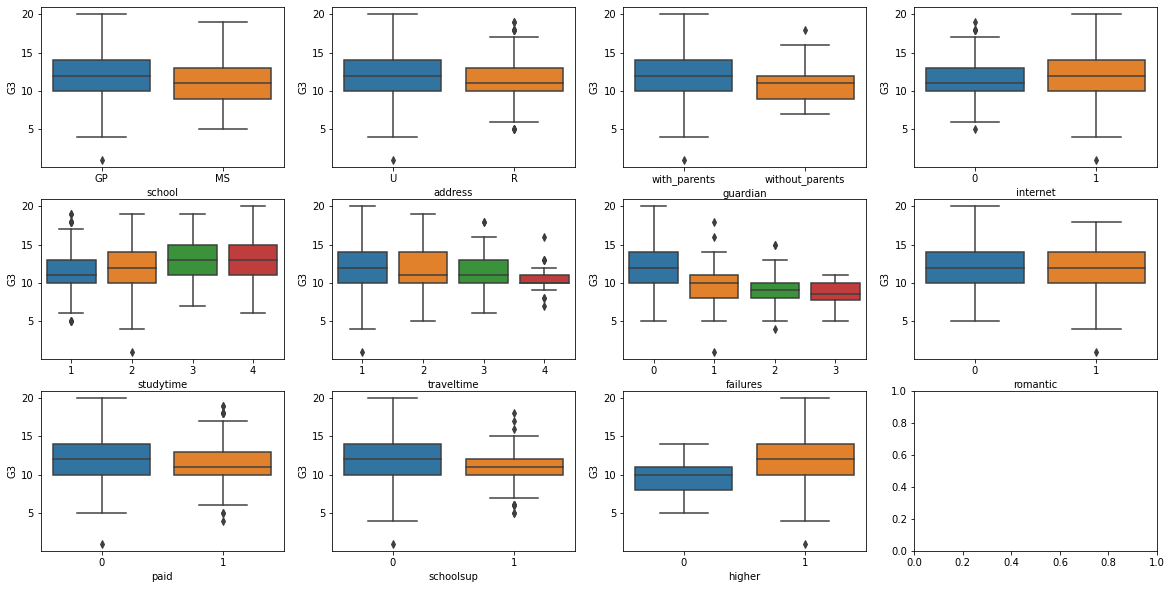

In [34]:
fig, ax = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(20)

sns.boxplot(x="school", y="G3", data=df, ax=ax[0][0])
sns.boxplot(x="address", y="G3", data=df, ax=ax[0][1])
sns.boxplot(x="guardian", y="G3", data=df, ax=ax[0][2])
sns.boxplot(x="internet", y="G3", data=df, ax=ax[0][3])
sns.boxplot(x="studytime", y="G3", data=df, ax=ax[1][0])
sns.boxplot(x="traveltime", y="G3", data=df, ax=ax[1][1])
sns.boxplot(x="failures", y="G3", data=df, ax=ax[1][2])
sns.boxplot(x="romantic", y="G3", data=df, ax=ax[1][3])
sns.boxplot(x="paid", y="G3", data=df, ax=ax[2][0])
sns.boxplot(x="schoolsup", y="G3", data=df, ax=ax[2][1])
sns.boxplot(x="higher", y="G3", data=df, ax=ax[2][2])


In [44]:
df.groupby(['school'])['G3'].mean().to_frame()

,G3
school,
GP,11.633420
MS,10.514706


In [46]:
df.groupby(['address'])['G3'].mean().to_frame()

,G3
address,
R,10.600000
U,11.620553


In [20]:
df.groupby(['guardian'])['G3'].mean().to_frame()

,G3
guardian,
with_parents,11.435633
without_parents,10.095890


In [67]:
df.groupby(['studytime'])['G3'].mean().to_frame()

,G3
studytime,
1,11.331081
2,11.879167
3,12.974359
4,12.898305


In [68]:
df.groupby(['traveltime'])['G3'].mean().to_frame()

,G3
traveltime,
1,12.152429
2,11.753333
3,11.492958
4,10.608696


Grades tends to drop as travel time increase

In [69]:
df.groupby(['failures'])['G3'].mean().to_frame()

,G3
failures,
0,12.400239
1,9.815534
2,9.148148
3,8.500000


In [49]:
df.groupby(['schoolsup'])['G3'].mean().to_frame()

,G3
schoolsup,
no,11.451892
yes,10.487395


In [50]:
df.groupby(['paid'])['G3'].mean().to_frame()

,G3
paid,
no,11.440534
yes,10.972727


In [54]:
df.groupby(['higher'])['G3'].mean().to_frame()

,G3
higher,
no,8.348315
yes,11.620942


Very high correlation

In [56]:
df.groupby(['internet'])['G3'].mean().to_frame()

,G3
internet,
no,10.534562
yes,11.553809


In [58]:
df.groupby(['romantic'])['G3'].mean().to_frame()

,G3
romantic,
no,11.624071
yes,10.830189


These features have strong correlation so we will keep them with minor feature engineering

<h2> The Weird

In [39]:
df.groupby(['freetime'])['G3'].mean().to_frame()

,G3
freetime,
alot,10.916667
not alot,11.391026


In [93]:
df.groupby(['age'])['G3'].mean().to_frame()

,G3
age,
15,11.747423
16,11.637011
17,11.563177
18,10.950450
19,8.964286
20,12.666667
21,9.666667
22,6.500000


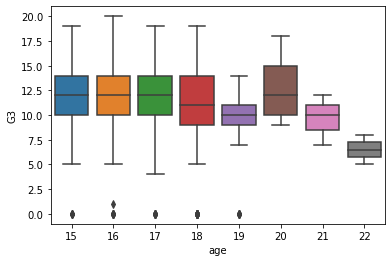

In [94]:
sns.boxplot(x="age", y="G3", data=df)

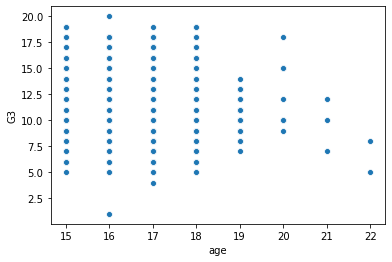

In [236]:
sns.scatterplot(x="age", y="G3", data=df)

In [58]:
df.groupby(['Fjob'])['G3'].mean().to_frame()

,G3
Fjob,
health/teacher,12.584906
other,11.201493


In [59]:
df.groupby(['Mjob'])['G3'].mean().to_frame()

,G3
Mjob,
health/teacher,12.391509
other,11.074519


In [47]:
df.groupby(['Medu'])['G3'].mean().to_frame()

,G3
Medu,
highly/not_educated,12.498413
somewhat_educated,10.842250


In [48]:
df.groupby(['Fedu'])['G3'].mean().to_frame()

,G3
Fedu,
highly/not_educated,12.257511
somewhat_educated,11.078915


In [512]:
df.groupby(['reason'])['G3'].mean().to_frame()

,G3
reason,
0,11.588583
1,12.327122


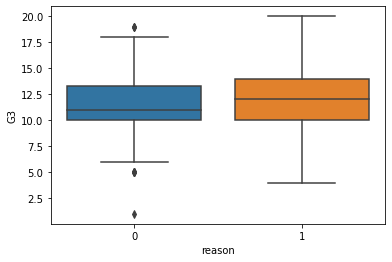

In [513]:
sns.boxplot(x="reason", y="G3", data=df)

We don't see a significant difference between father or mother as guardian. However, there is a noticable difference between parents as guardian versus other. So later in feature engineering, we are going to change this feature to parents as guardian (1) and not parents as guardian (0)

In [13]:
df.groupby(['famrel'])['G3'].mean().to_frame()

,G3
famrel,
aboveAverage,11.497494
averageOrBelow,10.837398


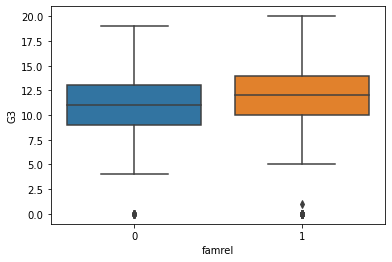

In [80]:
sns.boxplot(x="famrel", y="G3", data=df)

In [415]:
df.groupby(['goout'])['G3'].mean().to_frame()

,G3
goout,
1,11.777778
2,12.616034
3,12.086420
4,11.603687
5,11.166667


We are going to split this into very little, somewhat, and alot

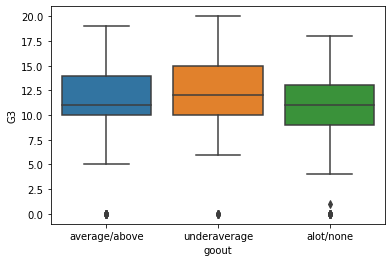

In [39]:
sns.boxplot(x="goout", y="G3", data=df)

In [17]:
df.groupby(['Dalc'])['G3'].mean().to_frame()

,G3
Dalc,
aboveAverage,9.826923
averageOrBelow,11.421371


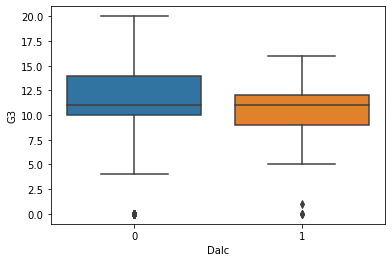

In [105]:
sns.boxplot(x="Dalc", y="G3", data=df)

In [10]:
df.groupby(['Walc'])['G3'].mean().to_frame()

,G3
Walc,
aboveAverage,10.488152
averageOrBelow,11.558223


We are going to feature engineer this to averge&below (0) and above average (1)

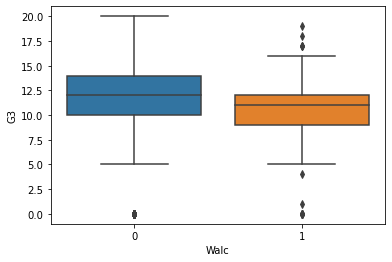

In [76]:
sns.boxplot(x="Walc", y="G3", data=df)

It has strong correlation after we feature engineer it

In [14]:
df.groupby(['health'])['G3'].mean().to_frame()

,G3
health,
1,12.270073
2,11.471545
3,11.065116
4,11.471264
5,11.073418


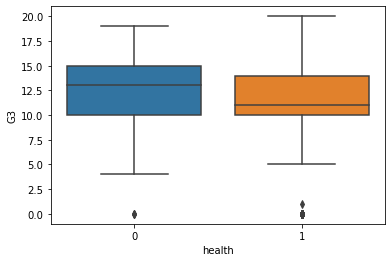

In [46]:
sns.boxplot(x="health", y="G3", data=df)

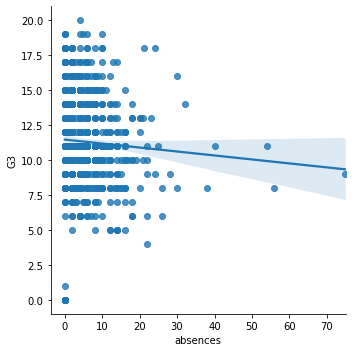

In [7]:
sns.scatterplot(x="absences", y="G3", data=df)

In [48]:
df.groupby(['absences'])['G3'].mean().to_frame()

,G3
absences,
0,10.888579
1,12.533333
2,12.085714
3,11.000000
4,11.746575
5,11.705882
6,11.987500
7,12.200000
8,11.265625


<h2>Data Engineering/cleaning

In [552]:
# drop weak correlatted features.
df.drop(['famsize', 'activities', 'famsup', 'sex', 'Pstatus', 'nursery'], axis=1, inplace=True)

In [553]:
# handle outliers
# I chose to cap off the target variable from above zero for 2 reasons: 1. Independent variable 'G3' is a binomal distribution 
# 2. the 0 scores in 'G3' are sckewing the data such a way that will drag the fitted funciton down to have arger MSE.
df = df[df['G3'] > 0]

In [554]:
# Bin the features
# split guardian to with or withour parents
df['guardian'] = df['guardian'].replace({'father': "with_parents", 'mother': "with_parents", 'other': "without_parents"})
# split to above average or average and blow
df['Walc'] = df['Walc'].replace({5: "aboveAverage", 4: "aboveAverage", 3: "averageOrBelow", 2: "averageOrBelow", 1: "averageOrBelow"})  
df['Dalc'] = df['Dalc'].replace({5: "aboveAverage", 4: "aboveAverage", 3: "averageOrBelow", 2: "averageOrBelow", 1: "averageOrBelow"})   
# split to above average or average and blow
df['famrel'] = df['famrel'].replace({5: "aboveAverage", 4: "aboveAverage", 3: "averageOrBelow", 2: "averageOrBelow", 1: "averageOrBelow"}) 
# bin health feature to very_bad vs not_very_bad
df['health'] = df['health'].replace({5: "not_very_bad", 4: "not_very_bad", 3: "not_very_bad", 2: "not_very_bad", 1: "very_bad"})
# bin goout to 3 gatagories
# df['goout'] = df['goout'].replace({5: "alot/none", 4: "average/above", 3: "average/above", 2: "under_average", 1: "alot/none"})
# combine course with other
# df['reason'] = df['reason'].replace({"course": "other"})
df['reason'] = df['reason'].replace({"other": 0, "course": 0, "home": 1, "reputation": 1})
# df['reason'] = df['reason'].replace({"other": 0, "course": 0, "home": 1, "reputation": 2})
# free time
df['freetime'] = df['freetime'].replace({5: "alot", 4: "not alot", 3: "not alot", 2: "not alot", 1: "not alot"}) 
# bin age to 3 catagories
# df['age'] = df['age'].replace({15: "17&under", 16: "17&under", 17: "17&under", 18: "18-20", 19: "18-20", 20: "18-20", 21: "21&older", 22: "21&older"}) 
# # bin Medu to 2 catagories
df['Medu'] = df['Medu'].replace({4: "highly/not_educated", 3: "somewhat_educated", 2: "somewhat_educated", 1: "somewhat_educated", 0: "highly/not_educated"})
# bin Fedu to 2 catagories
df['Fedu'] = df['Fedu'].replace({4: "highly/not_educated", 3: "somewhat_educated", 2: "somewhat_educated", 1: "somewhat_educated", 0: "highly/not_educated"})
# bin Mjob to 2 catagories
df['Mjob'] = df['Mjob'].replace({'at_home': "other", "health": "health/teacher", "other": "other", "services": "other", "teacher": "health/teacher"}) 
# bin Fjob to 2 catagories
df['Fjob'] = df['Fjob'].replace({'at_home': "other", "health": "health/teacher", "other": "other", "services": "other", "teacher": "health/teacher"}) 

In [555]:
#replace string to binary 0/1
df['school'] = df['school'].replace({'GP': 0, 'MS': 1})  
df['address'] = df['address'].replace({'R': 1, 'U': 0})
df['guardian'] = df['guardian'].replace({'with_parents': 1, 'without_parents': 0})
df['Walc'] = df['Walc'].replace({'aboveAverage': 1, 'averageOrBelow': 0})
df['Dalc'] = df['Dalc'].replace({'aboveAverage': 1, 'averageOrBelow': 0})
df['famrel'] = df['famrel'].replace({'aboveAverage': 1, 'averageOrBelow': 0})
df['health'] = df['health'].replace({'not_very_bad': 1, 'very_bad': 0})
df['freetime'] = df['freetime'].replace({'alot': 1, 'not alot': 0})
df['Medu'] = df['Medu'].replace({'highly/not_educated': 1, 'somewhat_educated': 0})
df['Fedu'] = df['Fedu'].replace({'highly/not_educated': 1, 'somewhat_educated': 0})
df['Mjob'] = df['Mjob'].replace({'health/teacher': 1, 'other': 0})
df['Fjob'] = df['Fjob'].replace({'health/teacher': 1, 'other': 0})
df['higher'] = df['higher'].replace({'yes': 1, 'no': 0})
df['internet'] = df['internet'].replace({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].replace({'yes': 1, 'no': 0})
df['paid'] = df['paid'].replace({'yes': 1, 'no': 0})
df['schoolsup'] = df['schoolsup'].replace({'yes': 1, 'no': 0})

<h2>Model building

In [557]:
X = pd.get_dummies(df)

In [558]:
X.head()

,school,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,paid,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,1,1,0,1,0,1,2,2,0,1,0,1,0,0,1,0,4,0,0,1,4,0,11,11
1,0,17,0,0,0,0,0,0,1,1,2,0,0,0,1,1,0,1,0,3,0,0,1,2,9,11,11
2,0,15,0,0,0,0,0,0,1,1,2,0,1,0,1,1,0,1,0,2,0,0,1,6,12,13,12
3,0,15,0,1,0,1,0,1,1,1,3,0,0,0,1,1,1,0,0,2,0,0,1,0,14,14,14
4,0,16,0,0,0,0,0,1,1,1,2,0,0,0,1,0,0,1,0,2,0,0,1,0,11,13,13


In [559]:
X.shape

(991, 27)

In [560]:
df_train = X.sample(frac = 0.8)    #train/cross-val
df_test = X.drop(df_train.index)   #test

In [561]:
X = df_train.drop(['G3'], axis=1)  #independent columns for train and cv
Y = df_train['G3'].values  #target column for train and cv

x = df_test.drop(['G3'], axis=1)  #independent columns for test
y = df_test['G3'].values  #target column for train and test

In [562]:
# by juliencs from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [563]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# train the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[-0.05962747  0.06160779 -0.10373568  0.13503568 -0.07601027  0.13795755
 -0.01473476  0.06287896 -0.19445769  0.0828603  -0.0324001  -0.09289515
 -0.0216771  -0.23804148 -0.00519955  0.07539175  0.01849581  0.05308104
 -0.20367152 -0.03396517 -0.37125865 -0.09890524 -0.12807262 -0.01014758
  0.16950821  0.81206422]
-0.07372358689392478


In [564]:
scores = cross_val_score(reg, X, Y, cv=5)

In [565]:
print("RMSE on Training set :", rmse_cv_train(reg).mean())
print("RMSE on Test set :", rmse_cv_test(reg).mean())
print("Score on Test set :", reg.score(x, y))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RMSE on Training set : 0.9132139370215627
RMSE on Test set : 0.802700487961497
Score on Test set : 0.9189501727591148
Accuracy: 0.90 (+/- 0.04)


Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 81.0
Ridge RMSE on Training set : 0.896880453311842
Ridge RMSE on Test set : 0.7973086685524936


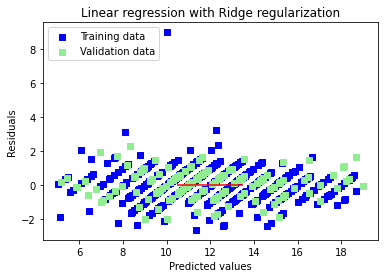

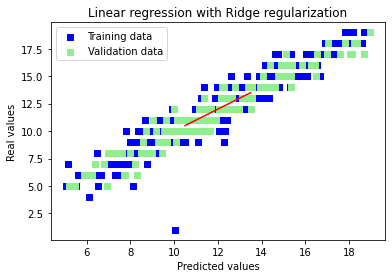

In [566]:
# 2* Ridge by juliencs from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [567]:
print("Score on Test set :", ridge.score(x, y))

Score on Test set : 0.9243076351750856


Best alpha : 0.03
Try again for more precision with alphas centered around 0.03
Best alpha : 0.0255
Lasso RMSE on Training set : 0.8411433987559368
Lasso RMSE on Test set : 1.2075521248610424


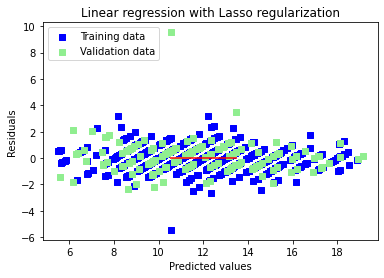

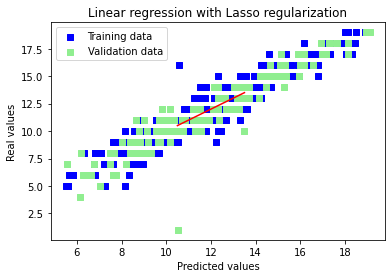

In [535]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [536]:
print("Score on Test set :", lasso.score(x, y))

Score on Test set : 0.9477995531779152


Best l1_ratio : 0.6
Best alpha : 0.03
Try again for more precision with l1_ratio centered around 0.6
Best l1_ratio : 0.63
Best alpha : 0.03
Now try again for more precision on alpha, with l1_ratio fixed at 0.63 and alpha centered around 0.03
Best l1_ratio : 0.63
Best alpha : 0.03
ElasticNet RMSE on Training set : 0.9294988390368086
ElasticNet RMSE on Test set : 0.83407097115204


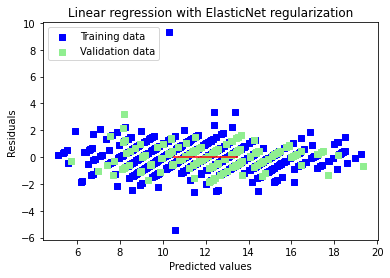

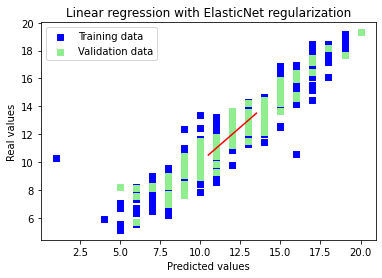

In [509]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


In [510]:
print("Score on Test set :", elasticNet.score(x, y))

Score on Test set : 0.9268058804189159
